In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import OPTICS
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("Flu_Classification.csv")
df.head()

,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,Diagnosis
0,67.0,38.11,F,unknown,Yes,Yes,unknown,No,unknown,No,unknown,H1N1
1,29.0,0.00,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
2,22.0,0.00,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
3,20.0,36.56,F,unknown,Yes,Yes,unknown,No,unknown,Yes,unknown,H1N1
4,21.0,0.00,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1


In [3]:
df.shape

(1485, 12)

In [4]:
# Converting string categorical variables into numeric categorical variables

def convert(df, n, k) :
    for col in df.iloc[:,n:k].columns:
        df[col] = df[col].astype('category').cat.codes
        
    return df

In [5]:
#OPTIC CLUSTERING with visualization

def optic_clustering(df,n,k):
    """Function to perform optic
    Args:
        df (dataframe): dataframe of points to be clustered
        n (integer): min number of point to form a cluster
        k(integer): Parameter for PCA
    """
    
    optics = OPTICS(min_samples = n).fit(df)

    
    pca = PCA(n_components=k)
    
    df['PC1'] = pca.fit_transform(df)[:,0]
    df['PC2'] = pca.fit_transform(df)[:,1]
    
    df['cluster'] = optics.labels_
    
    plot = sns.scatterplot(data=df,x="PC1",y="PC2",hue=df['cluster'])
    return df,plot

In [6]:
# PCA + OPTICS Clustering
def pca_optics(df, n, k):
    """Function to perform optics with pca
    Args:
        df (dataframe): dataframe of points to be clustered
        n (integer): min number of point to form a cluster
        k(integer): Parameter for PCA
    """
    
    pca = PCA(2)
    
    df['PC1'] = pca.fit_transform(df)[:,0]
    df['PC2'] = pca.fit_transform(df)[:,1]
    
    optics = OPTICS(min_samples = n).fit(df[['PC1', 'PC2']])

 
    plot = sns.scatterplot(data=df[['PC1', 'PC2']],x="PC1",y="PC2",hue=df['cluster'])
    
    return df, plot  

In [7]:
df = convert(df, 2,12)
df_cluster = df.iloc[:,0:11]
df_cluster.head()

,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer
0,67.0,38.11,0,2,1,1,2,0,2,0,1
1,29.0,0.00,1,2,2,2,2,2,2,2,1
2,22.0,0.00,0,2,2,2,2,2,2,2,1
3,20.0,36.56,0,2,1,1,2,0,2,1,1
4,21.0,0.00,1,2,2,2,2,2,2,2,1


,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,PC1,PC2,cluster
0,67.0,38.11,0,2,1,1,2,0,2,0,1,46.069436,-6.525346,-1
1,29.0,0.00,1,2,2,2,2,2,2,2,1,-2.769263,16.203410,1
2,22.0,0.00,0,2,2,2,2,2,2,2,1,-9.337539,13.796426,1
3,20.0,36.56,0,2,1,1,2,0,2,1,1,1.410378,-21.246474,0
4,21.0,0.00,1,2,2,2,2,2,2,2,1,-10.278834,13.447108,1


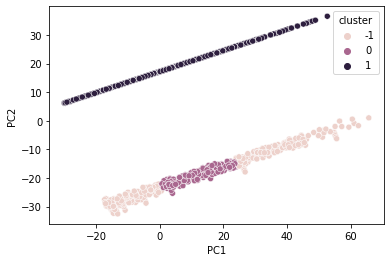

In [8]:
df_cluster1, plot1 = optic_clustering(df_cluster,200,2)
df_cluster1.head()

,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,PC1,PC2,cluster
0,67.0,38.11,0,2,1,1,2,0,2,0,1,65.167870,-9.174978,-1
1,29.0,0.00,1,2,2,2,2,2,2,2,1,-3.937722,22.919902,1
2,22.0,0.00,0,2,2,2,2,2,2,2,1,-13.224005,19.504900,1
3,20.0,36.56,0,2,1,1,2,0,2,1,1,2.017112,-30.041465,0
4,21.0,0.00,1,2,2,2,2,2,2,2,1,-14.554810,19.009314,1


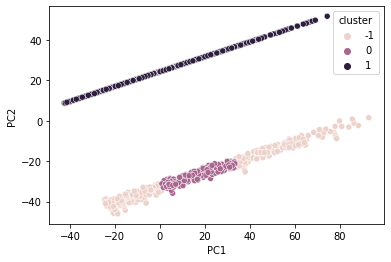

In [9]:
df_cluster2, plot2 = pca_optics(df_cluster,200,2)
df_cluster2.head()

In [10]:
# Visualization of clusters grouping

def cluster_grouping(df) :
    
    cluster_list = []
    n = df.cluster.unique()
    
    for i in n :
        cluster_list.append(df[df['cluster'] == i])
        
    return cluster_list

In [11]:
clusters = cluster_grouping(df_cluster1)
clusters[0]

,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,PC1,PC2,cluster
0,67.0,38.11,0,2,1,1,2,0,2,0,1,65.167870,-9.174978,-1
7,60.0,38.17,1,2,0,1,2,0,2,0,1,55.920347,-12.696096,-1
8,46.0,38.61,0,2,1,1,2,0,2,0,1,37.541837,-20.102875,-1
10,53.0,36.22,1,2,0,0,2,0,2,0,1,45.692270,-13.545341,-1
11,56.0,36.78,1,2,2,2,2,2,2,2,1,49.850376,-12.679076,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,4.0,37.20,0,2,1,2,2,2,2,2,1,-18.935375,-38.660803,-1
1426,79.0,37.80,1,2,1,2,2,2,2,2,1,80.888741,-2.800918,-1
1430,50.0,39.00,1,2,1,1,2,2,2,2,1,42.999755,-18.578669,-1
1436,61.0,39.00,1,2,1,1,1,2,2,2,1,57.600416,-13.195853,-1
